# Aula 2 - Imersão Dados 4 Alura

## Códigos feitos em aula

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [2]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [4]:
dados[["Valor", "Bairro"]] #Mostra valor de uma lista de colunas

,Valor,Bairro
0,R$ 7.000.000,Planalto Paulista
1,R$ 3.700.000,Jardim dos Estados
2,R$ 380.000,Jardim Reimberg
3,R$ 685.000,Jardim Morumbi
4,R$ 540.000,Mooca
...,...,...
10003,R$ 665.000,Vila Sofia
10004,R$ 2.300.000,Bosque da Saúde
10005,R$ 1.050.000,Vila da Saúde
10006,R$ 2.200\n /Mês,Vila Oratório


In [5]:
dados["Valor"][0] #mostra valor do primeiro indice (0)

'R$ 7.000.000'

In [6]:
dados["Valor"][0].split() #método para separar a string pelos espaços

['R$', '7.000.000']

In [7]:
dados.sample(10) #sample parar verificar os valores

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4616,Rua Michigan,Cidade Monções,São Paulo,117,3,4,2,R$ 1.200.000
9205,"Rua Catuquina, 55",Vila Formosa,São Paulo,130,1,1,1,R$ 233.376
2269,"Rua Simpatia, 401",Jardim das Bandeiras,São Paulo,476,4,3,4,R$ 3.640.000
2524,NaN,Vila Ida,São Paulo,380,4,5,4,R$ 3.650.000
8082,NaN,Vila Talarico,São Paulo,173,3,3,2,R$ 450.000
8022,"Rua Cordisburgo, 251",Jardim Leonor,São Paulo,850,4,4,6,R$ 6.500.000
6688,NaN,Jardim Paulista,São Paulo,525,4,6,6,R$ 7.500.000
8216,NaN,Saúde,São Paulo,170,4,4,2,R$ 1.249.000
9539,Rua Rubi,Aclimação,São Paulo,1500,4,2,6,R$ 5.000.000
3470,Avenida Fulfaro,Vila Clara,São Paulo,120,2,1,1,R$ 399.000


In [8]:
dados["Valor"].str.split(expand = True) #expande cada string separada em uma coluna cada

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [9]:
dados["Valor"].str.split(expand = True)[0].unique() #verifica se a primeira coluna é unica
#Foi verificado que ela apresenta apenas a string "R$"

array(['R$'], dtype=object)

In [10]:
dados["Valor"].str.split(expand = True)[2].unique() #verifica se a terceira coluna é unica
#Foi verificado que ela apresenta as seguintes string que significam que o imovel está para aluguel (o que não nos interessa)

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [11]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True) #adiciona as colunas das strings separadas no dataframe
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [12]:
dados[dados["Tipo_anuncio"].isnull()] #Mostra os imoveis que não possuem valor no "Tipo_anuncio", ou seja, apenas os que estão a venda e não aluguel

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [13]:
dados[dados["Tipo_anuncio"].isnull()]["Tipo_anuncio"].unique() #verifica se a coluna Tipo_anuncio não tem mais valores

array([None], dtype=object)

In [14]:
dados_vendas = dados[dados["Tipo_anuncio"].isnull()] #cria um novo dataframe sem os imoveis que não estão a venda
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


In [15]:
dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float) #tira os pontos e converte para float

C:\Users\belap\AppData\Local\Temp\ipykernel_1524\3938090964.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float) #tira os pontos e converte para float


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [16]:
dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float) #substitui a coluna com os valores convertidos

C:\Users\belap\AppData\Local\Temp\ipykernel_1524\3704892174.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float) #substitui a coluna com os valores convertidos
C:\Users\belap\AppData\Local\Temp\ipykernel_1524\3704892174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio"] = dados_vendas["Valor_anuncio"].str.replace(".", "").astype(float) #substitui a coluna com os valores convertidos


<AxesSubplot:ylabel='Frequency'>

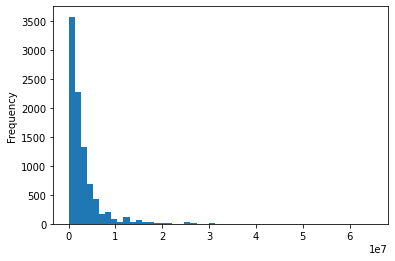

In [17]:
dados_vendas["Valor_anuncio"].plot.hist(bins = 50) #histograma dos novos valores numéricos

### Describe

In [18]:
dados_vendas.describe() #mostra todos os dados como média, valor min, valor max e outros

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [19]:
pd.set_option("display.precision", 2) #formatações para tirar a notação cientifica
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [20]:
dados_vendas.describe(include="all") #describe de todas as colunas incluindo as que possuem strings

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156.00,0
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,NaN,0
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,3052202.96,NaN
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,3944208.19,NaN
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,13000.00,NaN
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,890000.00,NaN
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,1800000.00,NaN
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,3500000.00,NaN


### Utilizando Seaborn para plotar gráficos

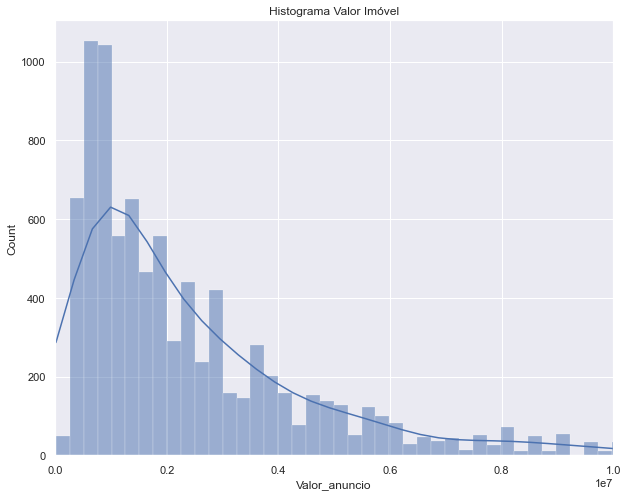

In [21]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio", kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

# Desafios:

1 - Criar uma escala de valores em milhões

2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

3 - Preço do metro quadrado por bairro, plotar gráfico ideal

4 - Explorar as bibliotecas de visualizações e colocar as suas conclusões

5 - Pesquisar uma visualização para analisar os quartis, mediana e outliers

### Questão 1

In [22]:
dados_vendas["Valor_anuncio"] / 1000000

0       7.00
1       3.70
2       0.38
3       0.69
4       0.54
        ... 
10002   1.50
10003   0.67
10004   2.30
10005   1.05
10007   0.27
Name: Valor_anuncio, Length: 9156, dtype: float64

In [23]:
dados_vendas["Valor_anuncio_mi"] = dados_vendas["Valor_anuncio"] / 1000000

C:\Users\belap\AppData\Local\Temp\ipykernel_1524\1529837105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor_anuncio_mi"] = dados_vendas["Valor_anuncio"] / 1000000


In [24]:
dados_vendas[["Rua", "Bairro", "Metragem", "Quartos", "Banheiros", "Vagas", "Valor_anuncio", "Valor_anuncio_mi"]]

,Rua,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_anuncio_mi
0,"Avenida Itacira, 255",Planalto Paulista,1000,4,8,6,7000000.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,496,4,4,4,3700000.00,3.70
2,Rua Alba Valdez,Jardim Reimberg,125,4,3,2,380000.00,0.38
3,NaN,Jardim Morumbi,310,3,2,4,685000.00,0.69
4,"Rua Tobias Barreto, 195",Mooca,100,3,2,2,540000.00,0.54
...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,267,3,6,4,1500000.00,1.50
10003,Rua Tapuçu,Vila Sofia,95,2,2,2,665000.00,0.67
10004,Rua Guararema,Bosque da Saúde,605,8,7,5,2300000.00,2.30
10005,Rua Estero Belaco,Vila da Saúde,205,3,3,6,1050000.00,1.05


### Questão 2

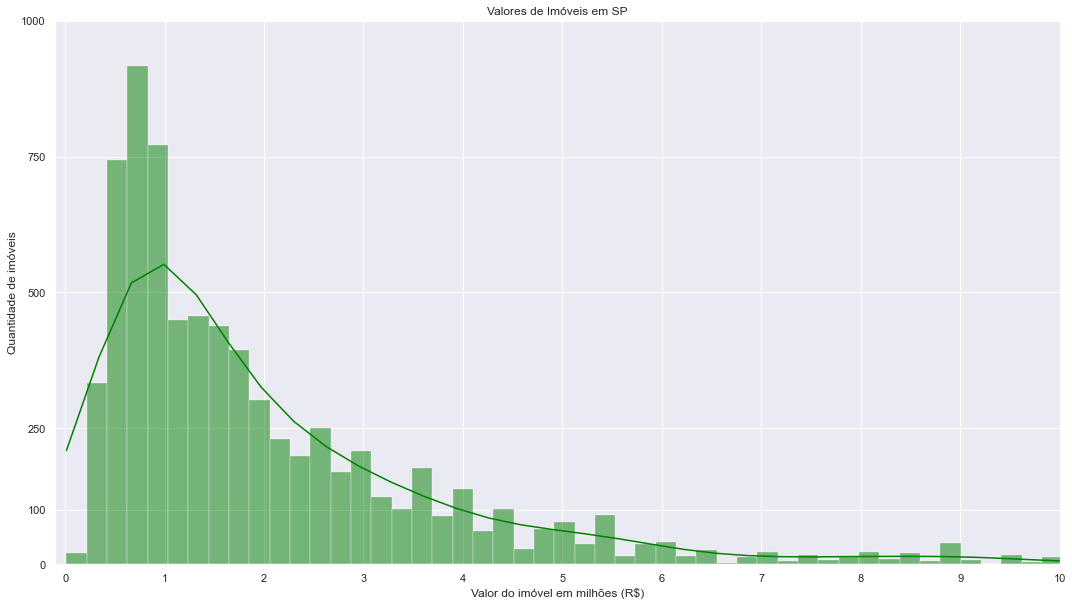

In [25]:
sns.set()
plt.figure(figsize=(18, 10))
ax = sns.histplot(data = dados_vendas[dados_vendas["Banheiros"] < 6], x = "Valor_anuncio_mi", kde = True, color="green")
ax.set_title("Valores de Imóveis em SP")
ax.set_xlabel("Valor do imóvel em milhões (R$)")
ax.set_ylabel("Quantidade de imóveis")
plt.xticks(list(range(0,11)))
plt.yticks([0, 100, 250, 500, 750, 1000])
plt.xlim((-0.1, 10))
plt.show()

### Questão 3

In [26]:
dados_vendas["Valor_anuncio"] / dados_vendas["Metragem"] #preço do metro quadrado em geral de cada imóvel

0       7000.00
1       7459.68
2       3040.00
3       2209.68
4       5400.00
          ...  
10002   5617.98
10003   7000.00
10004   3801.65
10005   5121.95
10007   2213.11
Length: 9156, dtype: float64

In [27]:
soma_valores_bairro = dados_vendas.groupby("Bairro")["Valor_anuncio"].sum() #preço do m2 por bairro
soma_metragem_bairro = dados_vendas.groupby("Bairro")["Metragem"].sum()

valor_m2_bairro = pd.DataFrame(soma_valores_bairro/soma_metragem_bairro)
valor_m2_bairro


,0
Bairro,
Aclimação,7162.69
Alto da Boa Vista,5708.74
Alto da Lapa,6961.30
Alto da Mooca,4385.00
Alto de Pinheiros,11126.34
...,...
Vila Água Funda,4283.84
Água Branca,7065.77
Água Fria,5604.53


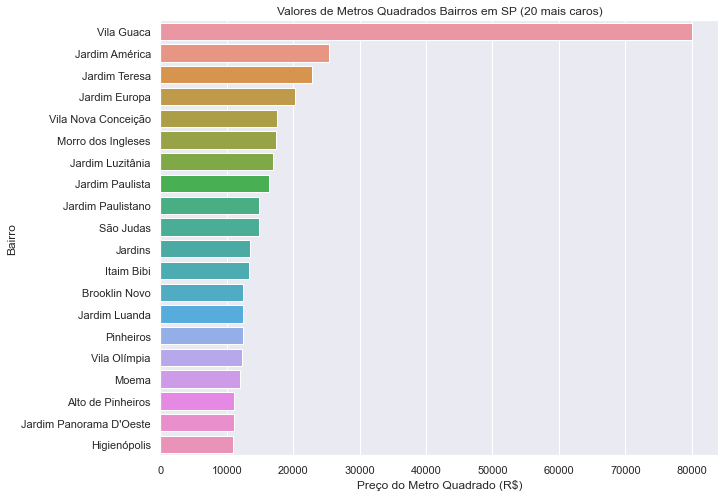

In [28]:
valor_m2_bairro_maiores = pd.DataFrame(valor_m2_bairro[0].sort_values(ascending=False).head(20))
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = valor_m2_bairro_maiores[0], y=valor_m2_bairro_maiores.index)
ax.set_xlabel("Preço do Metro Quadrado (R$)")
ax.set_title("Valores de Metros Quadrados Bairros em SP (20 mais caros)")
plt.show()

### Questão 4

### Questão 5